In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib 


In [2]:
url="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/formart_house.csv"

In [3]:
home=pd.read_csv(url)
home=home.iloc[:-1]
home


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
home=home.apply(pd.to_numeric)

In [5]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: title={'center': 'case'}>

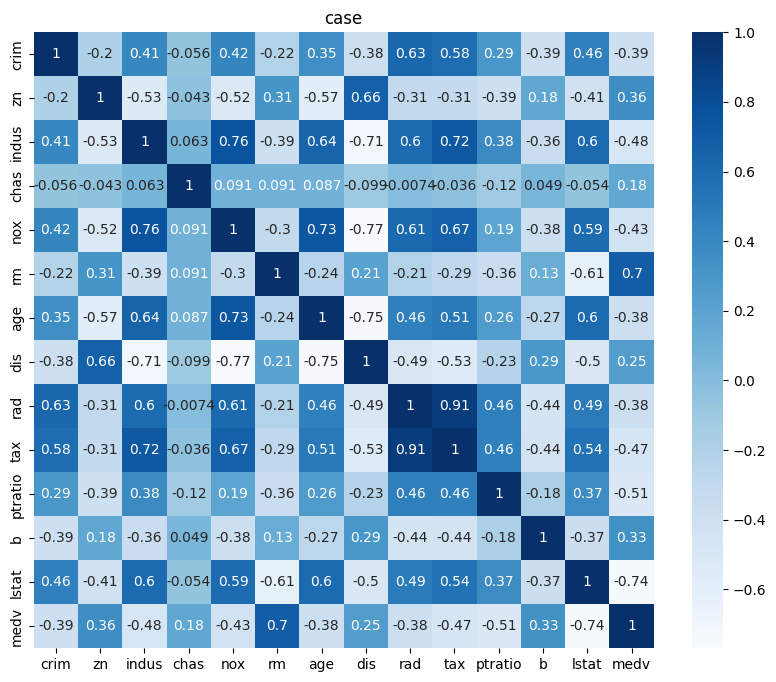

In [6]:
plt.figure(figsize=(10,8))
plt.title('case')
sns.heatmap(home.corr(),annot=True , cmap="Blues")


In [7]:
X=home.drop("medv",axis=1)
y=home["medv"]
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size = 0.2, 
random_state = 667)

In [9]:
X_train.shape , X_test.shape
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
model.coef_

array([-9.62573031e-02,  5.36358855e-02,  1.92274224e-02,  2.11621572e+00,
       -1.38691006e+01,  3.67710727e+00, -7.11730538e-04, -1.48933517e+00,
        3.18447363e-01, -1.54217765e-02, -8.39888443e-01,  9.88534046e-03,
       -5.76109967e-01])

In [11]:
model.intercept_

34.62675024416093

In [12]:
y_pred = model.predict(X_test)

In [13]:
r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2_score: ', r2score)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2_score:  0.6649019242096066
MAE:  3.758973981895195
MSE:  29.975136130831217
RMSE:  5.474955354231779


In [14]:
model.predict([[225,36,39,1,2,3,4,5,6,7,8,9,10]])[0]

c:\Users\libero.bo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-16.979075497286452

In [15]:

joblib.dump(model,'modello_home.pkl')

['modello_home.pkl']

In [16]:
newmodel = joblib.load('modello_home.pkl')
newmodel

LinearRegression()